In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc

In [9]:
fid_theta = [2, -0.1, 0.2, 10]

### creating the differnt Nsaga samples

In [10]:
N10 = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/iterations/", Nsamp=10)
np.save("../../data/Nsaga_Samples/10/jsm_MCMC.npy", N10.acc_surv_lgMh_mat)

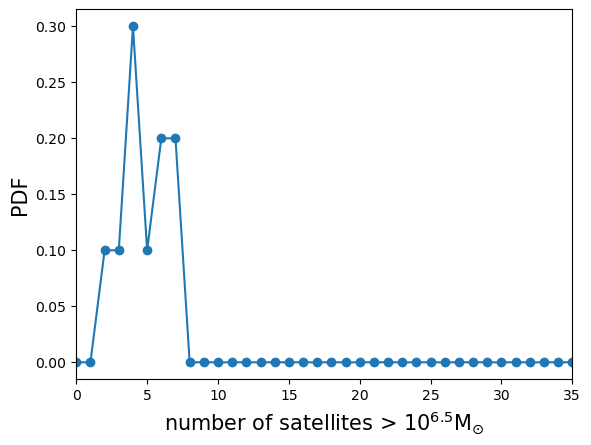

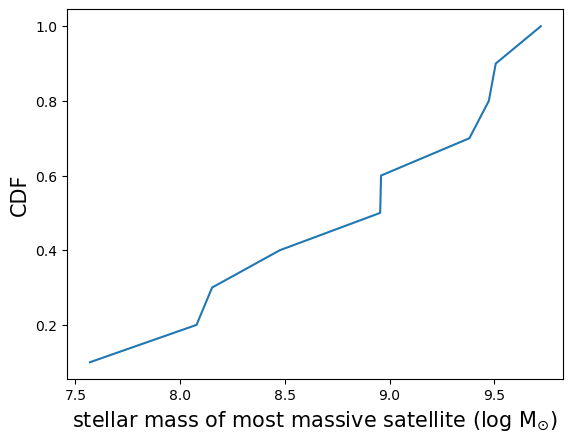

In [11]:
m10 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/Nsaga_Samples/10/jsm_MCMC.npy")
m10.get_stats(6.5)
m10.save_data("../../data/Nsaga_Samples/10/data.npy")

In [12]:
N50 = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/iterations/", Nsamp=50)
np.save("../../data/Nsaga_Samples/50/jsm_MCMC.npy", N50.acc_surv_lgMh_mat)

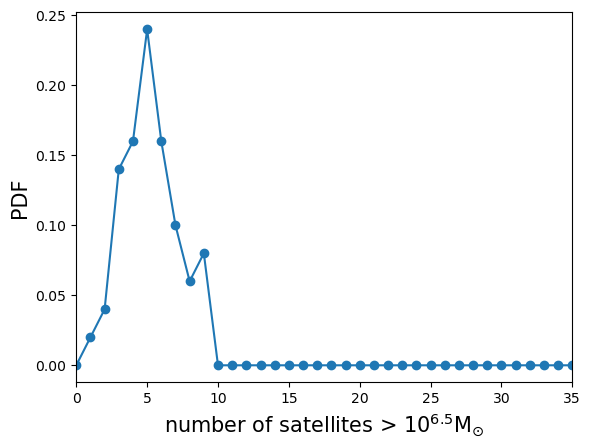

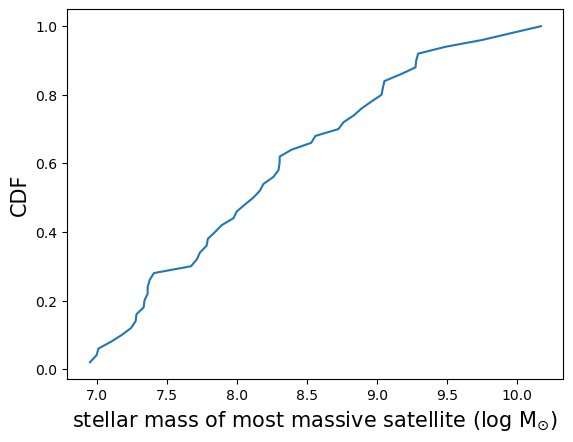

In [13]:
m50 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/Nsaga_Samples/50/jsm_MCMC.npy")
m50.get_stats(6.5)
m50.save_data("../../data/Nsaga_Samples/50/data.npy")

In [14]:
N100 = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/iterations/", Nsamp=100)
np.save("../../data/Nsaga_Samples/100/jsm_MCMC.npy", N100.acc_surv_lgMh_mat)

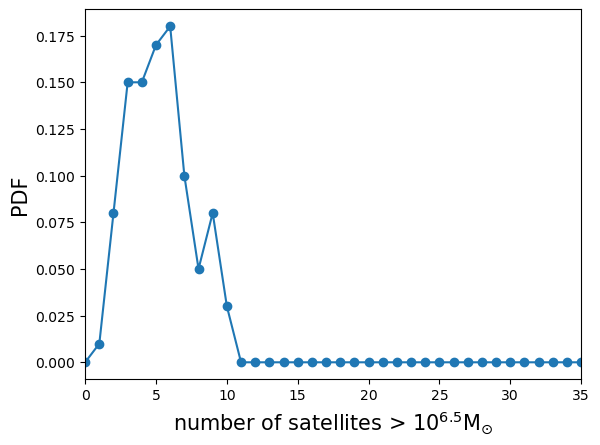

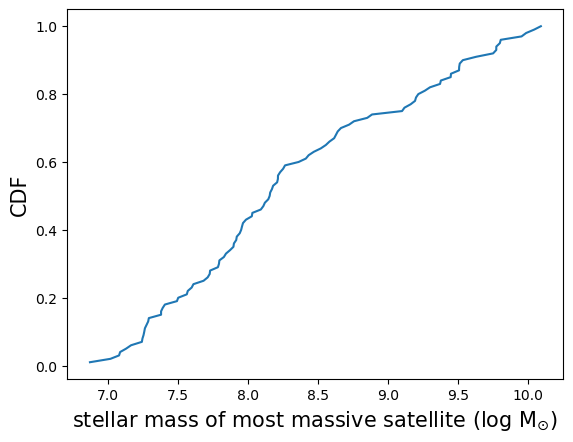

In [15]:
m100 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/Nsaga_Samples/100/jsm_MCMC.npy")
m100.get_stats(6.5)
m100.save_data("../../data/Nsaga_Samples/100/data.npy")

In [16]:
N500 = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/iterations/", Nsamp=500)
np.save("../../data/Nsaga_Samples/500/jsm_MCMC.npy", N500.acc_surv_lgMh_mat)

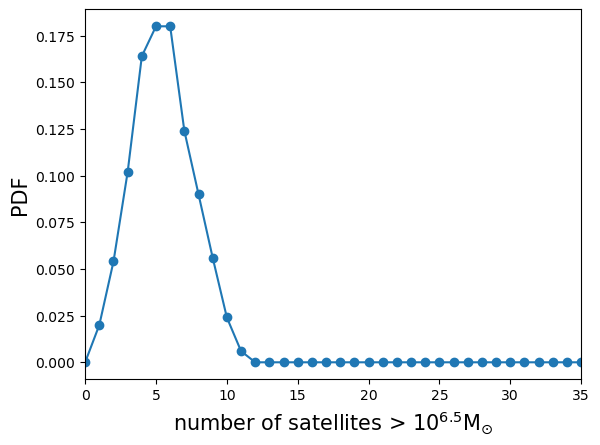

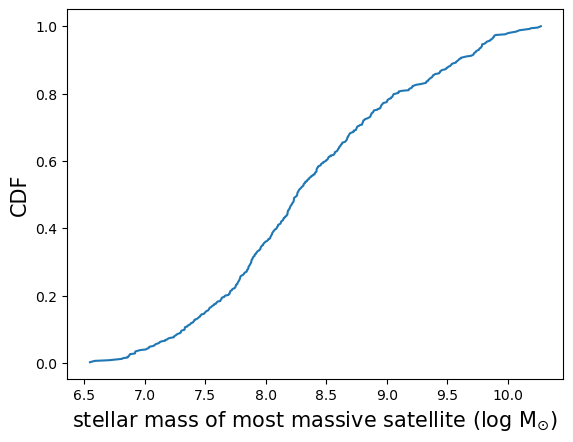

In [17]:
m500 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/Nsaga_Samples/500/jsm_MCMC.npy")
m500.get_stats(6.5)
m500.save_data("../../data/Nsaga_Samples/500/data.npy")

In [18]:
N1000 = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/iterations/", Nsamp=1000)
np.save("../../data/Nsaga_Samples/1000/jsm_MCMC.npy", N1000.acc_surv_lgMh_mat)

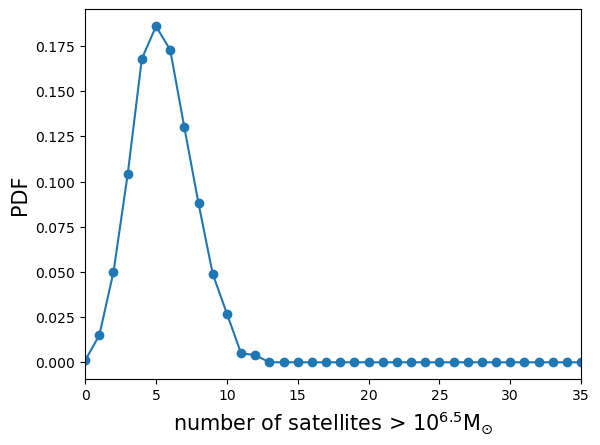

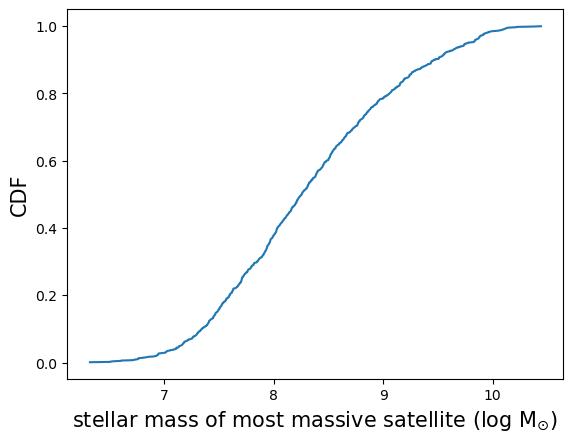

In [19]:
m1000 = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/Nsaga_Samples/1000/jsm_MCMC.npy")
m1000.get_stats(6.5)
m1000.save_data("../../data/Nsaga_Samples/1000/data.npy")

### creating data for the min mass expirement

In [ ]:
fid_theta = [1.8, -0.2, 0.4, 10.1]
data = jsm_mcmc.mock_data(fid_theta, jsm_SHMR.anchor, 0, "../../data/MW-analog/meta_data_psi3/jsm_MCMC.npy")
data.save_data("../../data/Min_Mass/MM_5_5/data.npy")
data.save_data("../../data/Min_Mass/MM_6_0/data.npy")
data.save_data("../../data/Min_Mass/MM_6_5/data.npy")

In [ ]:
lgMh = np.load("../../data/min_mass/MM_5_5/data.npy")[0]
lgMs = np.load("../../data/min_mass/MM_5_5/data.npy")[1]

In [ ]:
plt.scatter(lgMh, lgMs)

### playing with the two stats

In [ ]:
plt.scatter(data.stat.Msmax, data.stat.satfreq)
plt.grid()

In [ ]:
models = jsm_mcmc.models(fid_theta, jsm_SHMR.anchor, data.lgMh_models)
models.get_stats(min_mass=6.5)

In [ ]:
pixels = 20

In [ ]:
binM = np.linspace(6,11,pixels)

binN = np.linspace(0,pixels,pixels)

bincentersM = 0.5 * (binM[1:] + binM[:-1])
bincentersN = 0.5 * (binN[1:] + binN[:-1])

In [ ]:
hist2d, xedges, yedges = np.histogram2d(models.stat.Msmax, models.stat.satfreq, (binM, binN))
image = np.rot90(hist2d)

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(image, extent=[bincentersM.min(), bincentersM.max(), bincentersN.min(), bincentersN.max()])
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
plt.scatter(data.stat.Msmax, data.stat.satfreq, color="white", marker=".")
plt.ylabel("N satellites")
plt.xlabel("log Ms max")
fig.colorbar(im)
plt.show()